In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
df = pd.read_json('data/data.json')

In [6]:
pd.set_option('display.max_columns', None)

In [53]:
df.has_analytics.value_counts()

0    13290
1     1047
Name: has_analytics, dtype: int64

In [15]:
df.isnull().sum()

acct_type                0
approx_payout_date       0
body_length              0
channels                 0
country                 81
currency                 0
delivery_method         16
description              0
email_domain             0
event_created            0
event_end                0
event_published         99
event_start              0
fb_published             0
gts                      0
has_analytics            0
has_header            5409
has_logo                 0
listed                   0
name                     0
name_length              0
num_order                0
num_payouts              0
object_id                0
org_desc                 0
org_facebook            59
org_name                 0
org_twitter             59
payee_name               0
payout_type              0
previous_payouts         0
sale_duration          155
sale_duration2           0
show_map                 0
ticket_types             0
user_age                 0
user_created             0
u

In [26]:
df['fraud'] = df['acct_type'].apply(lambda x: True if 'fraud' in x else False)

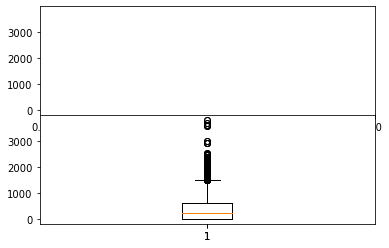

In [51]:
fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0)
axs = axs = gs.subplots(sharex=False, sharey=True)
ax[0] = plt.boxplot(x=df.user_age, data=df.fraud==True)
ax[1] = plt.boxplot(x=df.user_age, data=df.fraud==False)

In [54]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,False
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",54.0,54,0,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,False
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0.0,0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None,False
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,False


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

In [98]:
from sklearn.decomposition import PCA

In [99]:
pca = PCA()

In [104]:
text = df[['name', 'description', 'org_name', 'org_desc', 'fraud']]

In [106]:
text.to_csv('text.csv')

In [108]:
text.head()

,name,description,org_name,org_desc,fraud
0,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...","<p><a href=""http://s432.photobucket.com/albums...",Party Starz Ent & Diverse Int'l Group,,True
1,Winthrop RUF Winter Getaway,"<p>Join us for a quick, one-night, community-b...",RUF at Winthrop University,"<p>Since 1987, RUF has ministered to students ...",False
2,DRDP (2010) Teacher Training,"<h3><span class=""subcategory""><strong>Teacher ...",University Preparation School in collaboration...,"<p><a href=""http://www.desiredresults.com"">www...",False
3,ITTA Affiliation 2013,"<p style=""margin-bottom: 1.3em; padding-bottom...",,,False
4,Self Defense for Writers and Filmmakers: For A...,<p>Writers and filmmakers need to understand t...,Arts & Business Council of Greater Boston,"<p><font face=""Arial""><font size=""2""><strong>T...",False


In [118]:
pprint(text.iloc[11111].org_desc)

('<p><font size="2"><font color="#800080"><strong>Nuvo-Burlesque<br '
 '/></strong></font>Vivacious, courageous, and a fun loving workaholic would '
 'be the best way to explain Carla Catherwood. Born and raised in British '
 'Columbia, Canada she has worked professionally in the entertainment industry '
 'for 10 years. She is most known for her producing, directing and her '
 'Nuvo-Burlesque style choreography and is currently represented by Toronto’s '
 'very own Do-Dat Entertainment. On top of that Carla is a well diverse and '
 'strong dancer as well.\xa0 Just recently Carla was cast to dance beside '
 'Vanessa Hudgens in the new feature film\xa0 “Sucker Punch” and also has been '
 'cast in a principal dancer/actor role on the hit tv show Smallville. She has '
 'also been blessed to work beside such celebrities and amazing professionals '
 'like Michael Buble, Shania Twain, Kelly Osbourne, Russell Peters, Hugh '
 'Hefner, Jessica Alba, and Halle Berry.<font color="#800080"><strong>

In [120]:
text.iloc[11111].description = 

'<p>Chic-A-Boom Room is coming to Vancouver!!\xa0</p>\r\n<p>The powerhouses of sexy dance,\xa0<a style="color: #ffcc00; text-decoration: none;" href="http://www.divagirlentertainment.com/"><strong>DivaGirl</strong></a><strong>\xa0&amp; CeCe\'s Nuvo-Burlesque,</strong>\xa0are teaming up to bring you the ultimate live and interactive cabaret show in Toronto- the\xa0<strong><a style="color: #ffcc00; text-decoration: none;" href="http://divagirl-inc.com/entertainment/2011/09/09/wanna-come-to-the-chic-a-boom-room/">Chic-A-Boom Room</a>.\xa0</strong>A little bit of tease and humor with a whole lotta class and talent- this is one steamy show that you don’t want to miss!</p>\r\n<p style="line-height: normal; padding-top: 0px; padding-right: 0px; padding-bottom: 8px; padding-left: 0px; font-family: \'Helvetica Neue\', Helvetica, Arial, sans-serif; font-size: 13px; margin: 0px;">From Toronto to Vancouver CeCe\'s Nuvo-Burlesque &amp; DivaGirl Entertainment present: WONDERLAND - A sexy spin on the

In [123]:
from html.parser import HTMLParser

In [125]:
def remove_html_markup(s):
    tag = False
    quote = False
    out = ""

    for c in s:
            if c == '<' and not quote:
                tag = True
            elif c == '>' and not quote:
                tag = False
            elif (c == '"' or c == "'") and tag:
                quote = not quote
            elif not tag:
                out = out + c

    return out

In [129]:
copy = text.copy()

In [131]:
copy.description = text.description.map(lambda x: remove_html_markup(x))

In [133]:
copy.org_desc = copy.org_desc.map(lambda x: remove_html_markup(x))

In [134]:
copy.head()

,name,description,org_name,org_desc,fraud
0,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",\r\n \r\nParty Starz Entertaintment &amp; Dive...,Party Starz Ent & Diverse Int'l Group,,True
1,Winthrop RUF Winter Getaway,"Join us for a quick, one-night, community-buil...",RUF at Winthrop University,"Since 1987, RUF has ministered to students at ...",False
2,DRDP (2010) Teacher Training,Teacher Training on the Desired Results Develo...,University Preparation School in collaboration...,www.desiredresults.us,False
3,ITTA Affiliation 2013,Affiliations are now due in respect of the 201...,,,False
4,Self Defense for Writers and Filmmakers: For A...,Writers and filmmakers need to understand thei...,Arts & Business Council of Greater Boston,The Arts &amp; Business Council of Greater Bos...,False
